In [1]:
import api_calls as api
import tokenisation as tkn
from tqdm import tqdm
import os
import regex as re
import json
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import fred
import numpy as np
from dotenv import load_dotenv
load_dotenv()
fred.key(os.getenv("FREDPY_API_KEY"))

In [2]:
five_year_raw = fred.observations("DGS5")["observations"]
five_year = pd.Series([float(x["value"]) if x["value"] != "." else np.nan for x in five_year_raw], [pd.Timestamp(x["date"]) for x in five_year_raw])

In [3]:
HOME = Path.cwd()

In [4]:
dates = open("press_conference_dates.txt").read().splitlines()

In [5]:
system = "you are an economist. label the following sentence as hawkish, dovish or neutral and provide a reason for your label."
system_1 = "you are an expert sentence classifier. Classify the following sentence from FOMC into 'HAWKISH', 'DOVISH', or 'NEUTRAL' class. Label 'HAWKISH' if it is corresponding to tightening of the monetary policy, 'DOVISH' if it is corresponding to easing of the monetary policy, or 'NEUTRAL' if the stance is neutral. Provide the label in the first line and provide a short explanation in the second line."

In [6]:
def find_label(s):
    match = re.search(r'\b(hawkish|dovish|neutral)\b', s, re.IGNORECASE)
    if match:
        sentiment = match.group(0).lower()
        if sentiment == "hawkish":
            return 1
        elif sentiment == "dovish":
            return 0
        else:
            return 2
    else:
        print("no sentiment")
        return None

In [7]:
result = {date : [] for date in dates}
for date in tqdm(dates):
    pc = tkn.get_press_conferences(f"https://www.federalreserve.gov/mediacenter/files/FOMCpresconf{date}.pdf")
    pc_split = tkn.extract_lines(pc, ["CHAIR POWELL", "CHAIRMAN POWELL", "CHAIR YELLEN", "CHAIRWOMAN YELLEN", "CHAIR BERNANKE", "CHAIRMAN BERNANKE"])
    pc_tokenised = tkn.get_split_press_conference(pc_split)
    result[date] = pc_tokenised
    sentiments = await api.get_multiple_api_calls(system_1, pc_tokenised, "gpt-3.5-turbo-16k")
    for sentence, sentiment in zip(pc_tokenised, sentiments):
        result[date].append({"sentence": sentence, "label": find_label(sentiment), "reason": sentiment})
    with open(HOME/f"data/results/gpt-3.5-turbo/gpt-3.5-turbo_{date}.json", "w") as file:
        json.dump(result[date], file)


  0%|          | 0/71 [00:00<?, ?it/s]

2023-10-10 14:21:58 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023-10-10 14:21:59 [info     ] got response                   response_status=200
2023

  1%|▏         | 1/71 [05:10<6:02:40, 310.86s/it]

2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023-10-10 14:27:10 [info     ] got response                   response_status=200
2023

  3%|▎         | 2/71 [10:18<5:55:20, 309.00s/it]

2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023-10-10 14:32:17 [info     ] got response                   response_status=200
2023

  4%|▍         | 3/71 [10:25<3:13:38, 170.85s/it]

2023-10-10 14:32:24 [info     ] got response                   response_status=200
2023-10-10 14:32:24 [info     ] got response                   response_status=200
2023-10-10 14:32:24 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023-10-10 14:32:25 [info     ] got response                   response_status=200
2023

  6%|▌         | 4/71 [10:32<1:58:52, 106.46s/it]

2023-10-10 14:32:31 [info     ] got response                   response_status=200
2023-10-10 14:32:31 [info     ] got response                   response_status=200
2023-10-10 14:32:31 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023-10-10 14:32:32 [info     ] got response                   response_status=200
2023

  7%|▋         | 5/71 [10:41<1:18:09, 71.05s/it] 

2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023-10-10 14:32:40 [info     ] got response                   response_status=200
2023

  8%|▊         | 6/71 [10:49<53:44, 49.61s/it]  

2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023-10-10 14:32:48 [info     ] got response                   response_status=200
2023

 10%|▉         | 7/71 [10:57<38:32, 36.14s/it]

2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:56 [info     ] got response                   response_status=200
2023-10-10 14:32:57 [info     ] got response                   response_status=200
2023-10-10 14:32:57 [info     ] got response                   response_status=200
2023-10-10 14:32:57 [info     ] got response                   response_status=200
2023

 11%|█▏        | 8/71 [11:42<40:58, 39.02s/it]

2023-10-10 14:33:41 [info     ] got response                   response_status=200
2023-10-10 14:33:41 [info     ] got response                   response_status=200
2023-10-10 14:33:41 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023-10-10 14:33:42 [info     ] got response                   response_status=200
2023

 13%|█▎        | 9/71 [16:52<2:07:51, 123.73s/it]

2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023-10-10 14:38:52 [info     ] got response                   response_status=200
2023

 14%|█▍        | 10/71 [22:04<3:04:59, 181.96s/it]

2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:04 [info     ] got response                   response_status=200
2023-10-10 14:44:05 [info     ] got response                   response_status=200
2023-10-10 14:44:05 [info     ] got response                   response_status=200
2023-10-10 14:44:05 [info     ] got response                   response_status=200
2023

 15%|█▌        | 11/71 [22:14<2:09:16, 129.28s/it]

2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023-10-10 14:44:14 [info     ] got response                   response_status=200
2023

 17%|█▋        | 12/71 [22:25<1:31:31, 93.08s/it] 

2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023-10-10 14:44:24 [info     ] got response                   response_status=200
2023

 18%|█▊        | 13/71 [22:32<1:04:58, 67.21s/it]

2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023-10-10 14:44:32 [info     ] got response                   response_status=200
2023

 20%|█▉        | 14/71 [22:39<46:36, 49.07s/it]  

2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023-10-10 14:44:39 [info     ] got response                   response_status=200
2023

 21%|██        | 15/71 [22:46<33:55, 36.36s/it]

2023-10-10 14:44:45 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023-10-10 14:44:46 [info     ] got response                   response_status=200
2023

 23%|██▎       | 16/71 [23:51<41:02, 44.78s/it]

2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023-10-10 14:45:50 [info     ] got response                   response_status=200
2023

 24%|██▍       | 17/71 [23:59<30:26, 33.82s/it]

2023-10-10 14:45:58 [info     ] got response                   response_status=200
2023-10-10 14:45:58 [info     ] got response                   response_status=200
2023-10-10 14:45:58 [info     ] got response                   response_status=200
2023-10-10 14:45:58 [info     ] got response                   response_status=200
2023-10-10 14:45:58 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023-10-10 14:45:59 [info     ] got response                   response_status=200
2023

 25%|██▌       | 18/71 [24:06<22:53, 25.91s/it]

2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023-10-10 14:46:06 [info     ] got response                   response_status=200
2023

 27%|██▋       | 19/71 [24:16<18:07, 20.92s/it]

2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023-10-10 14:46:15 [info     ] got response                   response_status=200
2023

 28%|██▊       | 20/71 [24:25<14:51, 17.48s/it]

2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023-10-10 14:46:25 [info     ] got response                   response_status=200
2023

 30%|██▉       | 21/71 [24:33<12:07, 14.55s/it]

2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:32 [info     ] got response                   response_status=200
2023-10-10 14:46:33 [info     ] got response                   response_status=200
2023-10-10 14:46:33 [info     ] got response                   response_status=200
2023-10-10 14:46:33 [info     ] got response                   response_status=200
2023

 31%|███       | 22/71 [24:40<10:06, 12.37s/it]

2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023-10-10 14:46:40 [info     ] got response                   response_status=200
2023

 32%|███▏      | 23/71 [25:38<20:41, 25.86s/it]

2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023-10-10 14:47:37 [info     ] got response                   response_status=200
2023

 34%|███▍      | 24/71 [25:45<16:00, 20.43s/it]

2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023-10-10 14:47:45 [info     ] got response                   response_status=200
2023

 35%|███▌      | 25/71 [25:52<12:32, 16.36s/it]

2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023-10-10 14:47:52 [info     ] got response                   response_status=200
2023

 37%|███▋      | 26/71 [26:01<10:36, 14.14s/it]

2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023-10-10 14:48:01 [info     ] got response                   response_status=200
2023

 38%|███▊      | 27/71 [26:10<09:06, 12.41s/it]

2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023-10-10 14:48:09 [info     ] got response                   response_status=200
2023

 39%|███▉      | 28/71 [26:18<08:01, 11.19s/it]

2023-10-10 14:48:17 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023-10-10 14:48:18 [info     ] got response                   response_status=200
2023

 41%|████      | 29/71 [27:38<22:15, 31.81s/it]

2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:37 [info     ] got response                   response_status=200
2023-10-10 14:49:38 [info     ] got response                   response_status=200
2023-10-10 14:49:38 [info     ] got response                   response_status=200
2023

 42%|████▏     | 30/71 [27:47<17:09, 25.11s/it]

2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023-10-10 14:49:47 [info     ] got response                   response_status=200
2023

 44%|████▎     | 31/71 [27:55<13:19, 19.99s/it]

2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023-10-10 14:49:55 [info     ] got response                   response_status=200
2023

 45%|████▌     | 32/71 [28:03<10:33, 16.26s/it]

2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:02 [info     ] got response                   response_status=200
2023-10-10 14:50:03 [info     ] got response                   response_status=200
2023-10-10 14:50:03 [info     ] got response                   response_status=200
2023-10-10 14:50:03 [info     ] got response                   response_status=200
2023-10-10 14:50:03 [info     ] got response                   response_status=200
2023

 46%|████▋     | 33/71 [28:11<08:48, 13.92s/it]

2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023-10-10 14:50:11 [info     ] got response                   response_status=200
2023

 48%|████▊     | 34/71 [28:19<07:27, 12.10s/it]

2023-10-10 14:50:18 [info     ] got response                   response_status=200
2023-10-10 14:50:18 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023-10-10 14:50:19 [info     ] got response                   response_status=200
2023

 49%|████▉     | 35/71 [28:26<06:19, 10.55s/it]

2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023-10-10 14:50:26 [info     ] got response                   response_status=200
2023

 51%|█████     | 36/71 [28:34<05:40,  9.73s/it]

2023-10-10 14:50:33 [info     ] got response                   response_status=200
2023-10-10 14:50:33 [info     ] got response                   response_status=200
2023-10-10 14:50:33 [info     ] got response                   response_status=200
2023-10-10 14:50:33 [info     ] got response                   response_status=200
2023-10-10 14:50:33 [info     ] got response                   response_status=200
2023-10-10 14:50:33 [info     ] got response                   response_status=200
2023-10-10 14:50:34 [info     ] got response                   response_status=200
2023-10-10 14:50:34 [info     ] got response                   response_status=200
2023-10-10 14:50:34 [info     ] got response                   response_status=200
2023-10-10 14:50:34 [info     ] got response                   response_status=200
2023-10-10 14:50:34 [info     ] got response                   response_status=200
2023-10-10 14:50:34 [info     ] got response                   response_status=200
2023

 52%|█████▏    | 37/71 [28:42<05:16,  9.31s/it]

2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023-10-10 14:50:42 [info     ] got response                   response_status=200
2023

 54%|█████▎    | 38/71 [28:51<05:04,  9.23s/it]

2023-10-10 14:50:50 [info     ] got response                   response_status=200
2023-10-10 14:50:50 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023-10-10 14:50:51 [info     ] got response                   response_status=200
2023

 55%|█████▍    | 39/71 [29:01<04:55,  9.23s/it]

2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:00 [info     ] got response                   response_status=200
2023-10-10 14:51:01 [info     ] got response                   response_status=200
2023-10-10 14:51:01 [info     ] got response                   response_status=200
2023

 56%|█████▋    | 40/71 [29:10<04:50,  9.36s/it]

2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023-10-10 14:51:10 [info     ] got response                   response_status=200
2023

 58%|█████▊    | 41/71 [34:18<49:27, 98.91s/it]

2023-10-10 14:56:17 [info     ] got response                   response_status=200
2023-10-10 14:56:17 [info     ] got response                   response_status=200
2023-10-10 14:56:17 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023-10-10 14:56:18 [info     ] got response                   response_status=200
2023

 59%|█████▉    | 42/71 [34:23<34:10, 70.72s/it]

2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:22 [info     ] got response                   response_status=200
2023-10-10 14:56:23 [info     ] got response                   response_status=200
2023-10-10 14:56:23 [info     ] got response                   response_status=200
2023-10-10 14:56:23 [info     ] got response                   response_status=200
2023

 61%|██████    | 43/71 [34:30<24:07, 51.69s/it]

2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023-10-10 14:56:30 [info     ] got response                   response_status=200
2023

 62%|██████▏   | 44/71 [34:38<17:18, 38.48s/it]

2023-10-10 14:56:37 [info     ] got response                   response_status=200
2023-10-10 14:56:37 [info     ] got response                   response_status=200
2023-10-10 14:56:37 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023-10-10 14:56:38 [info     ] got response                   response_status=200
2023

 63%|██████▎   | 45/71 [34:47<12:50, 29.63s/it]

2023-10-10 14:56:46 [info     ] got response                   response_status=200
2023-10-10 14:56:46 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023-10-10 14:56:47 [info     ] got response                   response_status=200
2023

 65%|██████▍   | 46/71 [34:56<09:48, 23.56s/it]

2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:56 [info     ] got response                   response_status=200
2023-10-10 14:56:57 [info     ] got response                   response_status=200
2023

 66%|██████▌   | 47/71 [35:06<07:44, 19.36s/it]

2023-10-10 14:57:05 [info     ] got response                   response_status=200
2023-10-10 14:57:05 [info     ] got response                   response_status=200
2023-10-10 14:57:05 [info     ] got response                   response_status=200
2023-10-10 14:57:05 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023-10-10 14:57:06 [info     ] got response                   response_status=200
2023

 68%|██████▊   | 48/71 [35:15<06:12, 16.17s/it]

2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:14 [info     ] got response                   response_status=200
2023-10-10 14:57:15 [info     ] got response                   response_status=200
2023

 69%|██████▉   | 49/71 [35:25<05:15, 14.32s/it]

2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023-10-10 14:57:25 [info     ] got response                   response_status=200
2023

 70%|███████   | 50/71 [35:35<04:35, 13.11s/it]

2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023-10-10 14:57:35 [info     ] got response                   response_status=200
2023

 72%|███████▏  | 51/71 [35:45<04:03, 12.16s/it]

2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023-10-10 14:57:45 [info     ] got response                   response_status=200
2023

 73%|███████▎  | 52/71 [35:55<03:36, 11.42s/it]

2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023-10-10 14:57:54 [info     ] got response                   response_status=200
2023

 75%|███████▍  | 53/71 [36:05<03:18, 11.00s/it]

2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023-10-10 14:58:04 [info     ] got response                   response_status=200
2023

 76%|███████▌  | 54/71 [36:14<02:59, 10.55s/it]

2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023-10-10 14:58:14 [info     ] got response                   response_status=200
2023

 77%|███████▋  | 55/71 [36:23<02:39,  9.98s/it]

2023-10-10 14:58:22 [info     ] got response                   response_status=200
2023-10-10 14:58:22 [info     ] got response                   response_status=200
2023-10-10 14:58:22 [info     ] got response                   response_status=200
2023-10-10 14:58:22 [info     ] got response                   response_status=200
2023-10-10 14:58:22 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023-10-10 14:58:23 [info     ] got response                   response_status=200
2023

 79%|███████▉  | 56/71 [36:33<02:29,  9.98s/it]

2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023-10-10 14:58:32 [info     ] got response                   response_status=200
2023

 80%|████████  | 57/71 [36:43<02:21, 10.08s/it]

2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023-10-10 14:58:43 [info     ] got response                   response_status=200
2023

 82%|████████▏ | 58/71 [37:48<05:43, 26.44s/it]

2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023-10-10 14:59:48 [info     ] got response                   response_status=200
2023

 83%|████████▎ | 59/71 [37:58<04:17, 21.49s/it]

2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023-10-10 14:59:57 [info     ] got response                   response_status=200
2023

 85%|████████▍ | 60/71 [38:08<03:19, 18.17s/it]

2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023-10-10 15:00:08 [info     ] got response                   response_status=200
2023

 86%|████████▌ | 61/71 [38:18<02:36, 15.60s/it]

2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023-10-10 15:00:17 [info     ] got response                   response_status=200
2023

 87%|████████▋ | 62/71 [38:28<02:05, 13.93s/it]

2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023-10-10 15:00:27 [info     ] got response                   response_status=200
2023

 89%|████████▊ | 63/71 [38:35<01:36, 12.01s/it]

2023-10-10 15:00:34 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023-10-10 15:00:35 [info     ] got response                   response_status=200
2023

 90%|█████████ | 64/71 [38:43<01:15, 10.77s/it]

2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023-10-10 15:00:43 [info     ] got response                   response_status=200
2023

 92%|█████████▏| 65/71 [38:52<01:00, 10.14s/it]

2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023-10-10 15:00:51 [info     ] got response                   response_status=200
2023

 93%|█████████▎| 66/71 [39:02<00:50, 10.07s/it]

2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023-10-10 15:01:01 [info     ] got response                   response_status=200
2023

 94%|█████████▍| 67/71 [39:09<00:37,  9.37s/it]

2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023-10-10 15:01:09 [info     ] got response                   response_status=200
2023

 96%|█████████▌| 68/71 [39:19<00:28,  9.42s/it]

2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023-10-10 15:01:19 [info     ] got response                   response_status=200
2023

 97%|█████████▋| 69/71 [39:28<00:18,  9.47s/it]

2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:28 [info     ] got response                   response_status=200
2023-10-10 15:01:29 [info     ] got response                   response_status=200
2023-10-10 15:01:29 [info     ] got response                   response_status=200
2023

 99%|█████████▊| 70/71 [40:33<00:26, 26.10s/it]

2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023-10-10 15:02:33 [info     ] got response                   response_status=200
2023

100%|██████████| 71/71 [45:44<00:00, 38.66s/it] 


In [9]:
total = 0
for key in result.keys():
    total+= sum([len(x) for x in result[key]])
total

2693946

In [5]:
file_names = os.listdir(HOME/"data/results/gpt-3.5-turbo/")

In [6]:
sentiment_list = []
for file_name in file_names:
    with open(HOME/f"data/results/gpt-3.5-turbo/{file_name}", "r") as file:
        pc = json.load(file)
    sentiments = [sentence["label"] for sentence in pc]
    sentiment_list.append(sentiments.count(1) / (sentiments.count(1) + sentiments.count(0) + sentiments.count(2)))

In [51]:
hawkishness = pd.Series(sentiment_list, [pd.Timestamp(date) for date in dates])
five_year_simple = five_year.reindex(hawkishness.index)

In [52]:
hawkishness.corr(five_year_simple)

0.2935252570960706

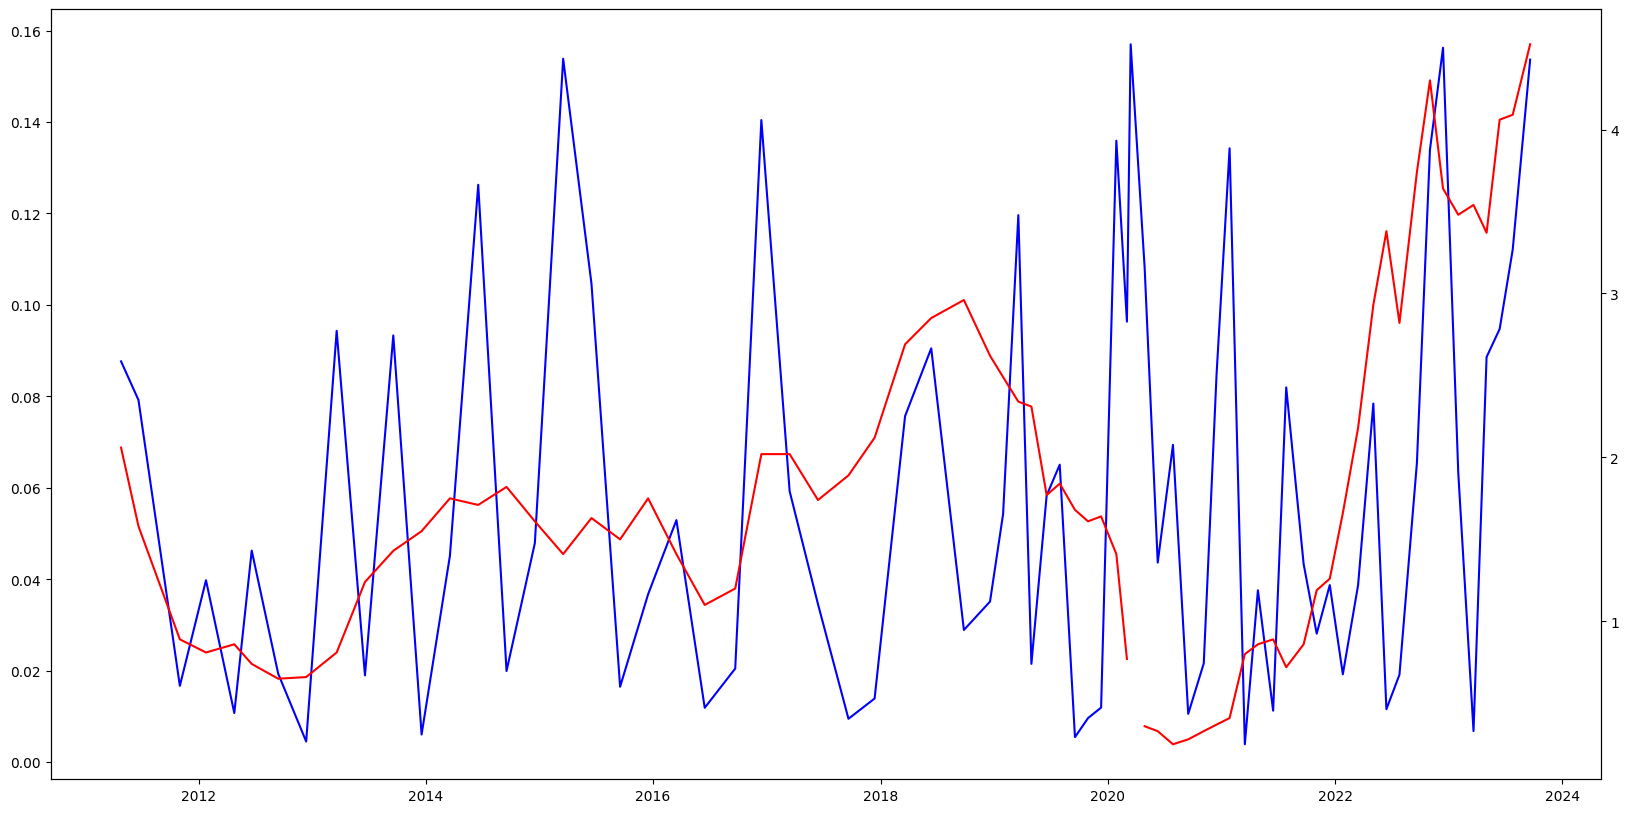

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(hawkishness, color = "blue")
ax2 = ax.twinx()
ax2.plot(five_year_simple, color = "red")

In [112]:
file_names_brevan = os.listdir(HOME/"data/results/brevan_results/")


In [113]:
file_names_brevan.remove(".DS_Store")

In [114]:
dates_brevan = [date[-13:-5] for date in file_names_brevan]

In [115]:
sentiment_list_brevan = []
for file_name in file_names_brevan:
    sentiment = []
    with open(HOME/f"data/results/brevan_results/{file_name}", "r") as file:
        pc = json.load(file)
    for label in ["speech", "question_answer"]:
        sentiment.extend([pc[label][i][1] for i in range(len(pc[label]))])
    sentiment_list_brevan.append(sentiment.count("hawkish") / (sentiment.count("hawkish") + sentiment.count("dovish")))
    

In [116]:
hawkishness_brevan = pd.Series(sentiment_list_brevan, [pd.Timestamp(date) for date in dates_brevan]).sort_index()
five_year_brevan = fp.series("DGS5").data[hawkishness.index[0]:]
five_year_brevan_simple = five_year_brevan.reindex(hawkishness_brevan.index)


In [135]:
hawkishness_brevan.shift(4).corr(five_year_brevan_simple)

0.8261048992073898

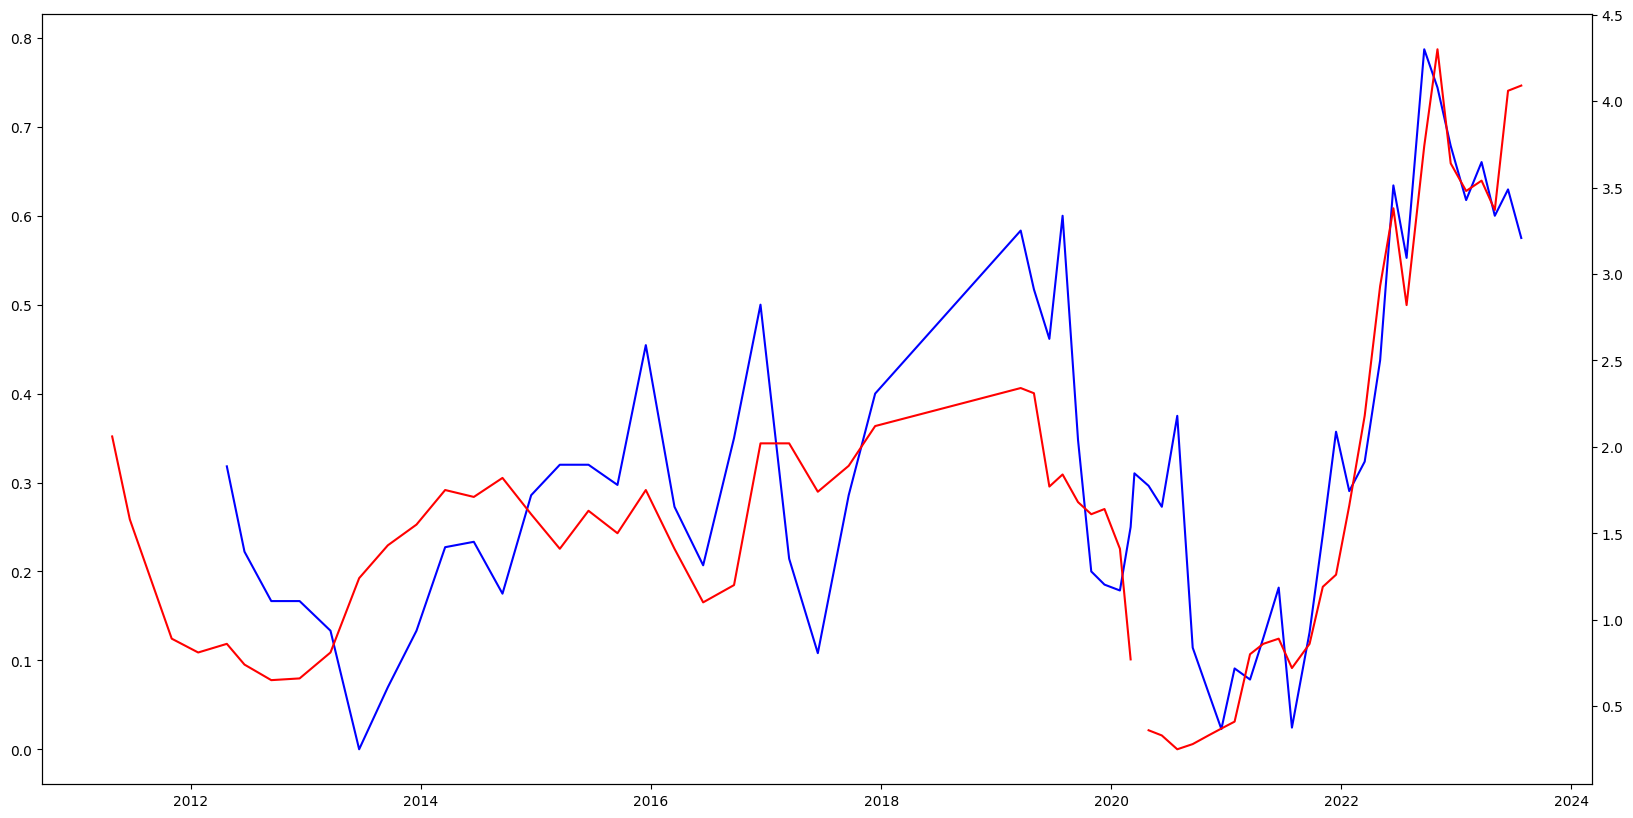

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(hawkishness_brevan.shift(4), color = "blue")
ax2 = ax.twinx()
ax2.plot(five_year_brevan_simple, color = "red")

In [54]:
files = os.listdir(HOME/"data/results/gpt-3.5-turbo/")

In [57]:
files[0][-13:-5]

'20181219'

In [58]:
for file in files:
    os.rename(HOME/f"data/results/gpt-3.5-turbo/{file}", HOME/f"data/results/gpt-3.5-turbo/gpt-3.5-turbo_{file[-13:-5]}.json")

In [59]:
tkn.get_press_conferences("https://www.federalreserve.gov/mediacenter/files/FOMCpresconf20110427.pdf")

'April 27, 2011 Chairman Bernanke’s Press Conference FINAL 1 of 26\xa0\xa0 Transcript of Chairman Bernanke’s Press Conference April 27, 2011  CHAIRMAN BERNANKE.  Good afternoon.  Welcome.  In my opening remarks, I’d like to briefly fi rst review today’s polic y decision.  I’ll then turn next to the Federal Open Market Committe e’s quarterly economic pr ojections also being released today, and I’ll place today’s policy decision in the context of the Committee’s projections and the Federal Re serve’s statutory mandate to foster maximum employment and price stability.  I’ll then be glad to take your questions.  Throughout today’s briefing, my goal will be to reflect the consensus of the Committee,  while taking note of the diversity of views as appropriate.  Of course, my remarks and in terpretations are my own responsibility.   In its policy statement rel eased earlier today, the Committee announced, first, that it is maintaining its existing policy of reinvesting principal payments from

In [63]:
await api.get_api_call([{"role":"system", "content":"when given a word. write a short poem about that word"},{"role":"user", "content":"poo"}], "gpt-4")

2023-10-10 10:53:10 [error    ] got Cannot connect to host api.openai.com:443 ssl:<ssl.SSLContext object at 0x10815b740> [nodename nor servname provided, or not known]. waiting... error_count=0 wait_time=4
2023-10-10 10:53:14 [error    ] got Cannot connect to host api.openai.com:443 ssl:<ssl.SSLContext object at 0x10815b740> [nodename nor servname provided, or not known]. waiting... error_count=1 wait_time=4
2023-10-10 10:53:18 [error    ] got Cannot connect to host api.openai.com:443 ssl:<ssl.SSLContext object at 0x10815b740> [nodename nor servname provided, or not known]. waiting... error_count=2 wait_time=4
2023-10-10 10:53:22 [error    ] got Cannot connect to host api.openai.com:443 ssl:<ssl.SSLContext object at 0x10815b740> [nodename nor servname provided, or not known]. waiting... error_count=3 wait_time=4
2023-10-10 10:53:26 [error    ] got Cannot connect to host api.openai.com:443 ssl:<ssl.SSLContext object at 0x10815b740> [nodename nor servname provided, or not known]. waiting

"In the realm where no one dares to look,\nLies the subject of our little book.\nUnsightly, unlovely, yet part of life's hook,\nThe humble poo, in every nook.\n\nIt's not a topic for the dinner table,\nYet without it, life wouldn't be stable.\nA sign of health, or illness fable,\nIn every creature, from man to sable.\n\nSo here's to poo, in all its glory,\nThough it may be a bit gory.\nIt's part of life's ongoing story,\nFrom dawn's light to evening's hoary."